<center> <h1> <b>HOMEWORK 3<b></h1> </center>
<center> <h2> Numerical Analysis II - 2022</h2> </center>
<center> <h3> Fabián Eduardo Suárez Castellanos and Sebastian Aguilera Novoa</h3> </center>

In [12]:
using Plots
plotlyjs()

Plots.PlotlyJSBackend()

# 1.T

Let $p$ a positive constant. Deduce the a priori error estimation $ \big($ on the norm  $ H^1: ||e||^2_{H^1}=||e'||^2_{L^2}+||e||^2_{L^2} \big) $ if a 
picewise linear continous functions finite element method is used to the following problem

$$
-u''+pxu'+\left( 1+\frac{p}{2}\right)u = f, \quad \text{on } (0,1),\\
u(0)=0, \qquad u(1) = 0
$$

# 2.T
Consider the problem

$$
-\epsilon u'' = c(x) u' +u = f(x), \qquad 0<x<1,
u(0)=u'(1)=0
$$

where $ \epsilon $ is a positive constant, the function $ c $ satisfies $ c(x)\geq 0, \; c'(x)\leq 0, $ and $ f\in L^2 (0,1) $. Prove that there are some positive constants $ C_1, C_2, $ and $ C_3 $ such that

$$
\epsilon ||u'| \leq C_1 ||f||, \qquad ||cu'|| \leq C_2||f||, \qquad \text{and} \qquad ||u'|| \leq C_3 ||f||
$$

where $ || \cdot || $ is the $ L^2(0,1) $ norm.

# 3.P 

Solve  numerically the convection-difusion problem using the finite element method. Utilize linear elements

$$
\begin{cases}
-\epsilon u_{xx}+u_x=0, & \text { if } x \in [0,1] \\ 
u(0)=0, \qquad u(1)=1
\end{cases}
$$

a) Find in detail the linear system of equations related to the discretization by the finite element method of the previous problem.

b) Consider different values of $ \epsilon = 0.1, 0.01,0.001 $ and plot the exact and approximate solution for $ n=200, 400, 600 $ mesh nodes. Discuss the results.

c) Use the numerical viscosity and optimus viscosity techniques  and repite the part b). Discuss the results.

d) Analyse the convergence of the programed methods on the norm $ L^2 (\Omega) $ and $ H^1 (\Omega) $.

## Solution

### a)

Remembering the picewise lineal polynomial functions

$$
\phi_{i}(x):= \begin{cases}\frac{x-x_{i-1}}{h_{i}} & \text { if } x \in \Omega_{i} \\ \frac{x_{i+1}-x}{h_{i+1}} & \text { if } x \in \Omega_{i+1} \\ 0 & \text {other case}\end{cases}, \qquad \phi_{i}'(x):= \begin{cases}\frac{1}{h_{i}} & \text { if } x \in \Omega_{i} \\ \frac{-1}{h_{i+1}} & \text { if } x \in \Omega_{i+1} \\ 0 & \text {other case}\end{cases}
$$

let's calculate the weak form of the equation. Since just one Dirichelt boundary conditions is zero it is necessary a vairable transformation

$$
w = u - x, \qquad w' = u' - 1, \qquad w'' = u''\\
w(0) = u(0)-0 = 0, \qquad w(1)=u(1)-1=0
$$

Then, the differential equations can be writen as

$$
-\epsilon u_{xx} + u_x = -\epsilon w_{xx} + w_x + 1=  0, \quad \Rightarrow \quad \begin{cases}
-\epsilon w_{xx} + w_x = -1, & \text { if } x \in [0,1] \\ 
w(0)=0, \qquad w(1)=0
\end{cases}
$$


Now, multiplying by a function $v$ such that $v(0)=v(1)=0$ and itegrating over $[0,1]$

$$ 
-\epsilon \int_0^1 v w_{xx} dx + \int_0^1 v w_x dx = - \int_0^1 v dx
$$

Applying integratipn by steps

$$ 
\epsilon \left[\int_0^1 v' w' dx - v w'\Big|_{0}^1 \right] + \int_0^1 v w' dx = - \int_0^1 v dx\\
\epsilon \int_0^1 v' w' dx  + \int_0^1 v w' dx = \int_0^1 (\epsilon v'+v) w' dx   = - \int_0^1 v dx
$$

Using the picewise linear polynomials

$$ 
w_h(x) = \sum_{j=0}^{n} w_j \phi_j(x), \qquad w_h'(x) = \sum_{j=0}^{n} w_j \phi_j'(x), \qquad v(x) = \phi_i(x)
$$

$$
\int_0^1 (\epsilon \phi_i'(x)+\phi_i(x)) \sum_{j=0}^{n} w_j \phi_j'(x) dx   = - \int_0^1 \phi_i(x) dx \\
\sum_{j=0}^{n} w_j \left( \epsilon \int_0^1  \phi_i'(x) \phi_j'(x) dx  \right)  + \sum_{j=0}^{n} w_j \left( \int_0^1 \phi_i(x) \phi_j'(x) dx  \right)  = - \int_0^1 \phi_i(x) dx 
$$

That can be writen as a matricial form $(A+M)w=b$ with

$$
A = (a_{ij}) = \epsilon \int_0^1  \phi_i'(x) \phi_j'(x) dx\\
M = (m_{ij}) =   \int_0^1 \phi_i(x) \phi_j'(x) dx \\
b = (b_{i}) =  - \int_0^1 \phi_i(x) dx 
$$


- if $j=i-1$

$$
a_{i, i-1} = \epsilon \int_0^1  \phi_i' \phi_{i-1}' dx = \epsilon \int_{x_{i-1}}^{x_i}  \frac{1}{h_i} \; \cdot  \; \frac{-1}{h_i} dx = -\frac{\epsilon}{h_i^2}h_i = -\frac{\epsilon}{h_i}\\
m_{i, i-1} =  \int_0^1 \phi_i \phi_{i-1}' dx = \int_{x_{i-1}}^{x_i} \left( \frac{x-x_{i-1}}{h_i}\right) \; \cdot  \; \frac{-1}{h_i} dx = - \frac{1}{h_i^2}\left(\frac{1}{2}x^2-x_{i-1}x\right)\Big|_{x_{i-1}}^{x_i}\\
= - \frac{1}{h_i^2}\left(\frac{1}{2}x_i^2-x_{i-1}x_i - \frac{1}{2}x_{i-1}^2+x_{i-1}^2\right) = - \frac{1}{h_i^2}\frac{h_i^2}{2} = -\frac{1}{2}
$$

- if $j=i$

$$
a_{i, i} = \epsilon \int_0^1  \phi_i' \phi_{i}' dx =  \epsilon \int_{x_{i-1}}^{x_{i+1}}  \phi_i' \phi_{i}' dx = \epsilon \int_{x_{i-1}}^{x_i}  \phi_i' \phi_{i}' dx + \epsilon \int_{x_{i}}^{x_{i+1}}  \phi_i' \phi_{i}' dx \\
= \epsilon \int_{x_{i-1}}^{x_i}  \frac{1}{h_i^2} dx + \epsilon \int_{x_{i}}^{x_{i+1}} \frac{1}{h_{i+1}^2} dx  = \epsilon\left(\frac{1}{h_i} + \frac{1}{h_{i+1}}\right) = \frac{\epsilon}{h_{i} h_{i+1}} (h_{i+1} + h_{i})\\
m_{i, i} =  \int_0^1 \phi_i \phi_{i}' dx = \int_{x_{i-1}}^{x_{i+1}}  \phi_i \phi_{i}' dx = \int_{x_{i-1}}^{x_{i}}  \phi_i \phi_{i}' dx + \int_{x_{i}}^{x_{i+1}}  \phi_i \phi_{i}' dx \\
\int_{x_{i-1}}^{x_{i}}   \left(\frac{x-x_{i-1}}{h_i} \right) \frac{1}{h_i} dx + \int_{x_{i}}^{x_{i+1}}   \left(\frac{x_{i+1}-x}{h_{i+1}} \right) \frac{-1}{h_{i+1}}  dx = \frac{1}{h_i^2}  \left(\frac{1}{2}x^2-x_{i-1}x\right)\Big|_{x_{i-1}}^{x_{i}} - \frac{1}{h_{i+1}^2}\left(x_{i+1}x-\frac{1}{2}x^2\right)\Big|_{x_{i}}^{x_{i+1}}\\
= \frac{1}{h_i^2} \frac{h_i^2}{2}- \frac{1}{h_{i+1}^2}\frac{h_{i+1}^2}{2} = 0
$$

And the load vector is

$$
b = (b_{i}) =  - \int_0^1 \phi_i(x) dx = - \int_{x_{i-1}}^{x_{i+1}}  \phi_i(x) dx = - \int_{x_{i-1}}^{x_{i}}  \phi_i dx- \int_{x_{i}}^{x_{i+1}}  \phi_i dx\\
b  =  - \int_{x_{i-1}}^{x_{i}} \left(\frac{x-x_{i-1}}{h_i} \right)dx - \int_{x_{i}}^{x_{i+1}}  \left(\frac{x_{i+1}-x}{h_{i+1}} \right)dx = -\frac{1}{h_i}\frac{h_i^2}{2}- \frac{1}{h_{i+1}} \frac{h_{i+1}^2}{2} = -\frac{1}{2} (h_i + h_{i+1})
$$

Thus, the matrices and vector are

$$
\boxed{
M = -\frac{1}{2}\begin{pmatrix}
0 & 1 & 0 & \\
1 & 0 & 1 & 0 &\\
& \ddots & \ddots & \ddots \\
&0 & 1 & 0 & 1  \\
 && 0 & 1 & 0 
\end{pmatrix}, \qquad
b = -\frac{1}{2} \begin{pmatrix}
h_1 + h_{2} \\
h_2 + h_{3}\\
\vdots\\
h_{n-2} + h_{n-1} \\
h_{n-1} + h_{n}
\end{pmatrix}\\
A = \epsilon \begin{pmatrix}
\left(\frac{1}{h_1} + \frac{1}{h_{2}}\right)  & -\frac{1}{h_2} & 0 & \\
-\frac{1}{h_2} & \left(\frac{1}{h_2} + \frac{1}{h_{3}}\right)  & -\frac{1}{h_3} & 0 &\\
& \ddots & \ddots & \ddots \\
&0 & -\frac{1}{h_{n-2}}& \left(\frac{1}{h_{n-2}} + \frac{1}{h_{n-1}}\right)  & -\frac{1}{h_{n-1}} \\
 && 0 & -\frac{1}{h_{n-1}} & \left(\frac{1}{h_{n-1}} + \frac{1}{h_{n}}\right)  
\end{pmatrix}}
$$

In [3]:
function Stiffness1D_Hom(x, epsilon)
    n = size(x,1)-2;    #x0< x1 < ... < xN n+1 puntos en la malla %
    A = zeros(n,n);
    A[1,1], A[n,n]= 1 / (x[2]- x[1]) , 1 / ( x[n+2] - x[n+1])
    [A[i-1:i,i-1:i] += 1/(x[i+1] - x[i]) * [1 -1; -1 1] for i in 2:n]
    
    return epsilon*A
end

function Load1D_hom(x)
    n    = size(x,1)-2;
    b    = zeros(n,1);
    b[1], b[n] = x[2]- x[1] , x[n+2]- x[n+1];
    [b[i-1:i] += (x[i]- x[i-1])*[1; 1] for i in 2:n]
    
    return -0.5 * b
end


function Mass1D_Hom(x)
    n = size(x,1)-2;
    M = zeros(n,n);  
    #M[1,1], M[n,n] =  r( 0.5*(x[2]+ x[1]) )* ( x[2]- x[1])/3, r( 0.5*(x[n+2]+ x[n+1]) )*  ( x[n+2] - x[n+1])/3;
    [M[i-1:i,i-1:i] += [0 1; 1 0] for i in 2:n ]
    
    return -0.5 .* M
end

Mass1D_Hom (generic function with 1 method)

### b)

Remembering the exact solution

$$
u(x) = \frac{e^{x/\epsilon} -1}{e^{1/\epsilon}-1} 
$$

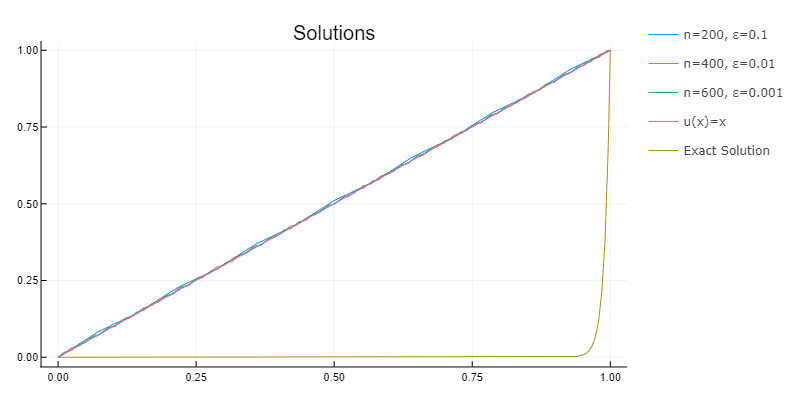

In [11]:
N, E = [200 400 600], [0.1 0.01 0.001]
n, epsilon = N[3], E[2]

fu_exact(x,epsilon) = exp((x-1)/epsilon) #(exp(x/epsilon)-1) / (exp(1/epsilon)-1)

function Solution(n, epsilon)
    x = LinRange(0,1,n)

    M = Mass1D_Hom(x)
    A = Stiffness1D_Hom(x, epsilon)
    b = Load1D_hom(x)

    wsol = [0; (M+A) \ b; 0]
    usol = wsol .+ x;
    return x, usol
end

x1, usol1 = Solution(N[1], E[1])
x2, usol2 = Solution(N[2], E[2])
x3, usol3 = Solution(N[3], E[3]*10)
x = LinRange(0,1,1000)

plot(x1, usol1,  title = "Solutions", label = "n=200, ε=0.1")
plot!(x2, usol2,  label = "n=400, ε=0.01")
plot!(x3, usol3,  label = "n=600, ε=0.001")
plot!(x3, x3,  label = "u(x)=x")
plot!(x, fu_exact.(x,epsilon), label = "Exact Solution")

### c)

To solve correctly the problem adaptative methods are used, since $\varepsilon << 1$ the advection dominates over the difusion. To solve the present inestabilities let's remember the definition of global Peclet number

$$
\mathbb{P}e_g = \frac{|\beta|L}{2\varepsilon} =  \frac{1}{2\varepsilon}
$$

Using the previous number we can define a viscosity coefficient as

$$
\varepsilon_h =  \varepsilon(1 + \phi(\mathbb{P}e))
$$

where $\phi$ is function of the global Peclet number such that

$$
\lim_{t \to O^+} \phi(t) = 0 
$$

note that when $\phi=0$ we get the original problem.

#### Numerical Viscosity (Upwind)

Taking $\phi(\mathbb{P}e) = \mathbb{P}e$, then 

$$\varepsilon_h =  \varepsilon(1 + \mathbb{P}e)  =  \varepsilon\left(1 + \frac{h_i}{2\varepsilon}\right)$$

$$
\boxed{
A = \varepsilon\begin{pmatrix}
\left(1 + \frac{h_1}{2\varepsilon}\right) \left(\frac{1}{h_1} + \frac{1}{h_{2}}\right)  & -\frac{1}{h_2} \left(1 + \frac{h_1}{2\varepsilon}\right) & 0 & \\
-\frac{1}{h_2} \left(1 + \frac{h_2}{2\varepsilon}\right) & \left(1 + \frac{h_2}{2\varepsilon}\right)\left(\frac{1}{h_2} + \frac{1}{h_{3}}\right)  & -\frac{1}{h_3} \left(1 + \frac{h_2}{2\varepsilon}\right) & 0 &\\
& \ddots & \ddots & \ddots \\
&0 & -\frac{1}{h_{n-2}} \left(1 + \frac{h_{n-2}}{2\varepsilon}\right)& \left(1 + \frac{h_{n-2}}{2\varepsilon}\right) \left(\frac{1}{h_{n-2}} + \frac{1}{h_{n-1}}\right)  & -\frac{1}{h_{n-1}} \left(1 + \frac{h_{n-2}}{2\varepsilon}\right) \\
 && 0 & -\frac{1}{h_{n-1}} \left(1 + \frac{h_{n-1}}{2\varepsilon}\right) & \left(1 + \frac{h_{n-1}}{2\varepsilon}\right) \left(\frac{1}{h_{n-1}} + \frac{1}{h_{n}}\right)  
\end{pmatrix}}
$$

In [ ]:
function Stiffness1D_Hom_Vis(x, epsilon)
    n = size(x,1)-2;    #x0< x1 < ... < xN n+1 puntos en la malla %
    A = zeros(n,n);
    A[1,1], A[n,n]= 1 / (x[2]- x[1]) , 1 / ( x[n+2] - x[n+1])
    [A[i-1:i,i-1:i] += 1/(x[i+1] - x[i]) * [1 -1; -1 1] for i in 2:n]
    
    return epsilon*A
end

#### Optimal Viscosity (Scharfetter - Gummel)

Taking $\phi(\mathbb{P}e) = \mathbb{P}e-1+B(2\mathbb{P}e)$, where

$$
B({\mathbb{P}e}) = \begin{cases} \frac{\mathbb{P}e}{e^{\mathbb{P}e}-1} & \text { if } \mathbb{P}e > 0 \\ 1 & \text { if } \mathbb{P}e = 0 \end{cases}
$$

then, since the Peclet number is always bigger than $0$.

$$\varepsilon_h =  \varepsilon(\mathbb{P}e+B(2\mathbb{P}e)) = \varepsilon\left(\frac{h_i}{2\varepsilon}+\frac{h_i}{\varepsilon} \frac{1}{e^{\frac{h_i}{\varepsilon}}-1}\right) = \frac{h_i}{2}\left(1+ \frac{2}{e^{\frac{h_i}{\varepsilon}}-1}\right) $$

$$
A = \begin{pmatrix}
\frac{h_1}{2}\left(1+ \frac{2}{e^{\frac{h_1}{\varepsilon}}-1}\right) \left(\frac{1}{h_1} + \frac{1}{h_{2}}\right)  & -\frac{1}{h_2} \frac{h_1}{2}\left(1+ \frac{2}{e^{\frac{h_i}{\varepsilon}}-1}\right) & 0 & \\
-\frac{1}{h_2} \frac{h_2}{2}\left(1+ \frac{2}{e^{\frac{h_2}{\varepsilon}}-1}\right) & \frac{h_2}{2}\left(1+ \frac{2}{e^{\frac{h_2}{\varepsilon}}-1}\right) \left(\frac{1}{h_2} + \frac{1}{h_{3}}\right)  & -\frac{1}{h_3} \frac{h_2}{2}\left(1+ \frac{2}{e^{\frac{h_2}{\varepsilon}}-1}\right) & 0 &\\
& \ddots & \ddots & \ddots \\
&0 & -\frac{1}{h_{n-2}} \frac{h_{n-2}}{2}\left(1+ \frac{2}{e^{\frac{h_{n-2}}{\varepsilon}}-1}\right) & \frac{h_{n-2}}{2}\left(1+ \frac{2}{e^{\frac{h_{n-2}}{\varepsilon}}-1}\right) \left(\frac{1}{h_{n-2}} + \frac{1}{h_{n-1}}\right)  & -\frac{1}{h_{n-1}} \frac{h_{n-2}}{2}\left(1+ \frac{2}{e^{\frac{h_{n-2}}{\varepsilon}}-1}\right) \\
 && 0 & -\frac{1}{h_{n-1}} \frac{h_{n-1}}{2}\left(1+ \frac{2}{e^{\frac{h_{n-1}}{\varepsilon}}-1}\right) & \frac{h_{n-1}}{2}\left(1+ \frac{2}{e^{\frac{h_{n-1}}{\varepsilon}}-1}\right) \left(\frac{1}{h_{n-1}} + \frac{1}{h_{n}}\right)  
\end{pmatrix}\\
\boxed{
A = \begin{pmatrix}
\frac{h_1 +h_2}{2h_2}\left(1+ \frac{2}{e^{\frac{h_1}{\varepsilon}}-1}\right) & -\frac{h_1}{2h_2}\left(1+ \frac{2}{e^{\frac{h_i}{\varepsilon}}-1}\right) & 0 & \\
-\frac{1}{2} \left(1+ \frac{2}{e^{\frac{h_2}{\varepsilon}}-1}\right) & \frac{h_2+h_3}{2h_3}\left(1+ \frac{2}{e^{\frac{h_2}{\varepsilon}}-1}\right)   & - \frac{h_2}{2h_3}\left(1+ \frac{2}{e^{\frac{h_2}{\varepsilon}}-1}\right) & 0 &\\
& \ddots & \ddots & \ddots \\
&0 & - \frac{1}{2}\left(1+ \frac{2}{e^{\frac{h_{n-2}}{\varepsilon}}-1}\right) & \frac{h_{n-2}+h_{n-1}}{2h_{n-1}}\left(1+ \frac{2}{e^{\frac{h_{n-2}}{\varepsilon}}-1}\right)   & - \frac{h_{n-2}}{2h_{n-1}}\left(1+ \frac{2}{e^{\frac{h_{n-2}}{\varepsilon}}-1}\right) \\
 && 0 & -\frac{1}{2}\left(1+ \frac{2}{e^{\frac{h_{n-1}}{\varepsilon}}-1}\right) & \frac{h_{n-1}+h_{n-1}}{2h_{n}}\left(1+ \frac{2}{e^{\frac{h_{n-1}}{\varepsilon}}-1}\right) 
\end{pmatrix}}
$$

In [ ]:
function Stiffness1D_Hom_OptVis(x, epsilon)
    n = size(x,1)-2;    #x0< x1 < ... < xN n+1 puntos en la malla %
    A = zeros(n,n);
    A[1,1], A[n,n]= 1 / (x[2]- x[1]) , 1 / ( x[n+2] - x[n+1])
    [A[i-1:i,i-1:i] += 1/(x[i+1] - x[i]) * [1 -1; -1 1] for i in 2:n]
    
    return epsilon*A
end

# 4TP.
Consider the one dimension difusion advection equation 

$$
\begin{cases}
-(\mu u' -\psi'u)', & \text { if } x \in [0,1] \\ 
u(0)=u(1)=0
\end{cases}
$$

where $ \mu $ is a positive constant and $ \psi  $ a given function.

a) Study the existence and uniqueness of the previous problem by introducing proper hypothesis over the function $ \psi $.

b) Consider the change of the variable $ u=\rho e^{\psi/\mu} $, where $ \rho $ is an unknown auxiliar funtion. Study the existence and uniqueness of the weak problem (1) and the new unknown $ \rho $. Calculate the analytical solution for the case $ \psi = \alpha x $ whit $ \alpha $ constant.

c) To both formulations (in $ u $ and $ \rho $) write the distretization of the finite elements.

d) Compare both approches in a) and b) from the theorical and numerical perspectives. For $ \psi = \alpha x $ calculate the numerical solution with $ \mu =0.1, 0.01 $, $ \alpha=1, -1 $ and a mesh size $h=0.1, 0.01$.